**Group Name:** Zixuan Zhou, Xinyue (Yolanda) Pan, Yining Song, Abe

**Code written by:** Zixuan Zhou

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df_zillow = pd.read_csv('zillow_chicago.csv')

In [4]:
df_zillow.head()

,zpid,longitude,latitude,bathrooms,bedrooms,address,price,zipcode,living_area,home_type,rent_zestimate,unit,time_on_zillow
0,65552033,-87.627540,41.861140,1.0,1.0,1530 S State St APT 415,2800.0,60605,1065.0,CONDO,2248.0,Apt 415,5625000
1,60270579,-87.649060,41.880234,2.0,2.0,843 W Monroe St APT 2F,3300.0,60607,1000.0,APARTMENT,3657.0,Apt 2F,46056000
2,446735593,-87.616850,41.885540,1.0,1.0,450 E Benton Pl #2308,2534.0,60601,690.0,APARTMENT,NaN,# 2308,90383000
3,89908245,-87.640450,41.894466,1.0,1.0,451 W Huron St UNIT 1209,3200.0,60654,850.0,APARTMENT,2643.0,Unit 1209,92258000
4,2112016331,-87.628944,41.874878,1.0,0.0,525 S Dearborn St APT 605,1695.0,60605,550.0,APARTMENT,2752.0,Apt 605,129830000


In [26]:
df_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zpid               4754 non-null   int64  
 1   longitude          4537 non-null   float64
 2   latitude           4537 non-null   float64
 3   bathrooms          4754 non-null   float64
 4   bedrooms           4754 non-null   float64
 5   address            4754 non-null   object 
 6   price              4754 non-null   float64
 7   zipcode            4754 non-null   object 
 8   living_area        3330 non-null   float64
 9   home_type          4754 non-null   object 
 10  rent_zestimate     3155 non-null   float64
 11  unit               3923 non-null   object 
 12  time_on_zillow     4754 non-null   int64  
 13  price_per_sqrfoot  3330 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 520.1+ KB


In [6]:
df_zillow.dropna(subset=['price'], inplace=True)
df_zillow.shape


(4754, 13)

In [24]:
df_zillow['zipcode'] = df_zillow['zipcode'].astype(str)

In [7]:
df_zillow['price_per_sqrfoot'] = df_zillow['price'] / df_zillow['living_area']
df_zillow['price_per_sqrfoot'] = df_zillow['price_per_sqrfoot'].round(2)
df_zillow.head()

,zpid,longitude,latitude,bathrooms,bedrooms,address,price,zipcode,living_area,home_type,rent_zestimate,unit,time_on_zillow,price_per_sqrfoot
0,65552033,-87.627540,41.861140,1.0,1.0,1530 S State St APT 415,2800.0,60605,1065.0,CONDO,2248.0,Apt 415,5625000,2.63
1,60270579,-87.649060,41.880234,2.0,2.0,843 W Monroe St APT 2F,3300.0,60607,1000.0,APARTMENT,3657.0,Apt 2F,46056000,3.30
2,446735593,-87.616850,41.885540,1.0,1.0,450 E Benton Pl #2308,2534.0,60601,690.0,APARTMENT,NaN,# 2308,90383000,3.67
3,89908245,-87.640450,41.894466,1.0,1.0,451 W Huron St UNIT 1209,3200.0,60654,850.0,APARTMENT,2643.0,Unit 1209,92258000,3.76
4,2112016331,-87.628944,41.874878,1.0,0.0,525 S Dearborn St APT 605,1695.0,60605,550.0,APARTMENT,2752.0,Apt 605,129830000,3.08


In [27]:
zipcode_stats = df_zillow.groupby("zipcode").agg(
    avg_price=("price", "mean"),
    count_listings=("zpid", "count"),
    avg_bedrooms=("bedrooms", "mean"),
    avg_bathrooms=("bathrooms", "mean"),
    avg_sqrfoot=("price_per_sqrfoot", "mean"),
).reset_index()

zipcode_stats

,zipcode,avg_price,count_listings,avg_bedrooms,avg_bathrooms,avg_sqrfoot
0,60601,4819.571429,7,1.571429,1.857143,3.704000
1,60602,2657.000000,5,1.000000,1.000000,3.152000
2,60603,2796.666667,3,1.333333,1.333333,3.365000
3,60604,4050.000000,2,2.000000,2.500000,2.820000
4,60605,2688.977273,44,1.295455,1.454545,2.733250
...,...,...,...,...,...,...
57,60707,2402.868421,38,2.447368,1.631579,1.828182
58,60803,1571.785714,14,1.857143,1.071429,1.750000
59,60804,1334.259259,27,1.481481,1.000000,1.628000
60,60805,2255.000000,5,2.200000,1.600000,1.950000


In [28]:
zipcode_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         62 non-null     object 
 1   avg_price       62 non-null     float64
 2   count_listings  62 non-null     int64  
 3   avg_bedrooms    62 non-null     float64
 4   avg_bathrooms   62 non-null     float64
 5   avg_sqrfoot     62 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


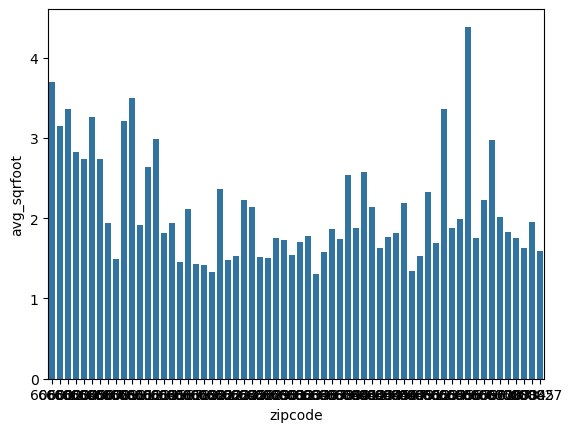

In [9]:
sns.barplot(x='zipcode', y='avg_sqrfoot', data=zipcode_stats)
plt.show()

For geospatial data processing and plotting, we referred to https://geopandas.org/en/stable/getting_started/introduction.html.

In [10]:
import geopandas as gpd

Boundaries file retrieved from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-ZIP-Codes/unjd-c2ca/about_data

In [11]:
# Load the Chicago zip codes GeoJSON file 
zipcodes_gdf = gpd.read_file("boundaries-zipcode-chicago.geojson")

# Check structure
print(zipcodes_gdf.head())
print(zipcodes_gdf.columns)
print(zipcodes_gdf.crs)  



  objectid    zip     shape_area      shape_len  \
0       33  60647  106052287.488  42720.0444058   
1       34  60639  127476050.762  48103.7827213   
2       35  60707  45069038.4783  27288.6096123   
3       36  60622  70853834.3797  42527.9896789   
4       37  60651  99039621.2518  47970.1401531   

                                            geometry  
0  MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ...  
1  MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ...  
2  MULTIPOLYGON (((-87.785 41.90915, -87.78531 41...  
3  MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...  
4  MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ...  
Index(['objectid', 'zip', 'shape_area', 'shape_len', 'geometry'], dtype='object')
EPSG:4326


In [29]:
zipcodes_gdf.rename(columns={"zip": "zipcode"}, inplace=True)
zipcodes_gdf['zipcode'] = zipcodes_gdf['zipcode'].astype(str)

In [30]:
zipcodes_gdf.head()

,objectid,zipcode,shape_area,shape_len,geometry
0,33,60647,106052287.488,42720.0444058,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,60639,127476050.762,48103.7827213,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,60707,45069038.4783,27288.6096123,"MULTIPOLYGON (((-87.785 41.90915, -87.78531 41..."
3,36,60622,70853834.3797,42527.9896789,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,60651,99039621.2518,47970.1401531,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


In [31]:
zipcodes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    61 non-null     object  
 1   zipcode     61 non-null     object  
 2   shape_area  61 non-null     object  
 3   shape_len   61 non-null     object  
 4   geometry    61 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 2.5+ KB


In [34]:
df_geo = zipcodes_gdf.merge(zipcode_stats, on="zipcode", how="left")
df_geo.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   objectid        61 non-null     object  
 1   zipcode         61 non-null     object  
 2   shape_area      61 non-null     object  
 3   shape_len       61 non-null     object  
 4   geometry        61 non-null     geometry
 5   avg_price       60 non-null     float64 
 6   count_listings  60 non-null     float64 
 7   avg_bedrooms    60 non-null     float64 
 8   avg_bathrooms   60 non-null     float64 
 9   avg_sqrfoot     60 non-null     float64 
dtypes: float64(5), geometry(1), object(4)
memory usage: 4.9+ KB


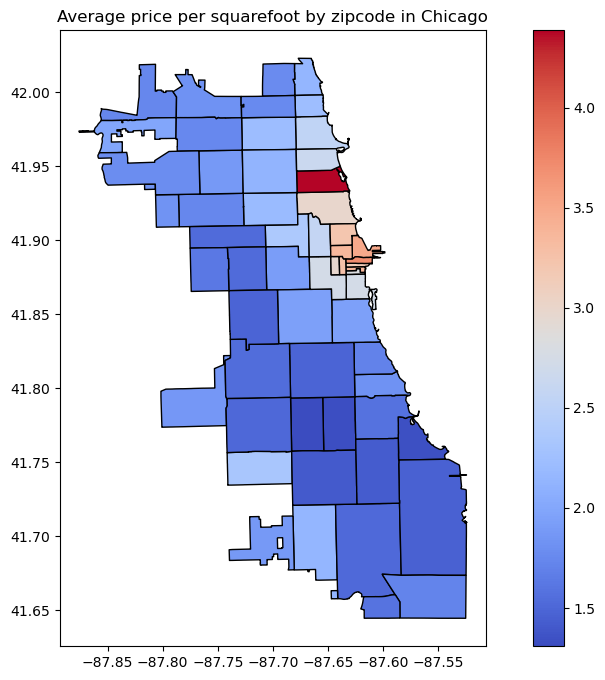

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
df_geo.plot(column="avg_sqrfoot", cmap="coolwarm", edgecolor="black", legend=True, ax=ax)

plt.title("Average price per squarefoot by zipcode in Chicago")
plt.show()